# 06-07 다층 퍼셉트론으로 손글씨 분류하기

## 1. 숫자 필기 데이터

images :  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
target :  0
전체 샘플의 수 : 1797
0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4
data :  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


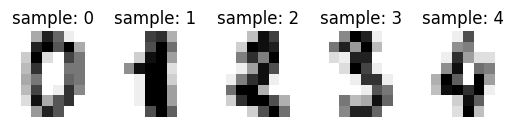

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# 데이터 확인
print("images : ", digits.images[0])
print("target : ", digits.target[0])
print('전체 샘플의 수 : {}'.format(len(digits.images)))

# 상위 5개의 샘플 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

for i in range(5):
  print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

# train data
print("data : ", digits.data[0])
X = digits.data
Y = digits.target

## 2. 다층 퍼셉트론 분류기 만들기


<ipython-input-22-552b69d77d06>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-22-552b69d77d06>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


Epoch    0/100 Cost: 2.596225
Epoch   10/100 Cost: 2.119463
Epoch   20/100 Cost: 1.843341
Epoch   30/100 Cost: 1.508330
Epoch   40/100 Cost: 1.143350
Epoch   50/100 Cost: 0.833398
Epoch   60/100 Cost: 0.598785
Epoch   70/100 Cost: 0.441436
Epoch   80/100 Cost: 0.342039
Epoch   90/100 Cost: 0.276119


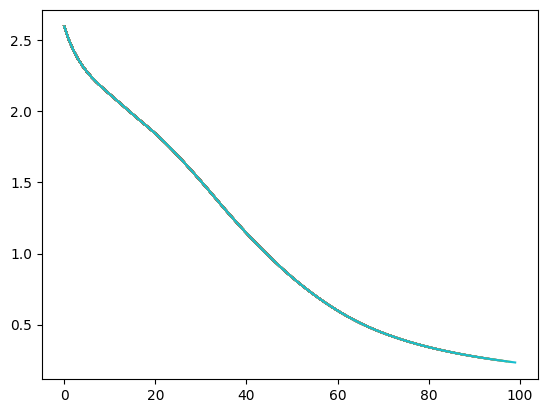

In [22]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),  # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)   # hidden_layer4 = 16, output_layer = 10
)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()   # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())
losses = []

for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))
  losses.append(loss.item())
  plt.plot(losses)